# Predicting the SPY
---

Gap down or up analysis.

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from StockPredictionTools import plot_roc_curve, gini

In [116]:
file_loc = 'SPY_5min_2022-01-03T09.00.00_2022-03-25T14.10.00.csv'
df = pd.read_csv(os.path.join('data',file_loc),parse_dates=['datetime'])
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['date'] = df['datetime'].dt.date
df['open_tick'] = (df['hour']==14)&(df['minute']==30)
df['close_tick'] = (df['hour']==21)&(df['minute']==0)
df_close_open = df[(df.open_tick)|(df.close_tick)].copy()
df_close_open['previous_close_price'] = df_close_open['close'].shift()
df_close_open['gap'] = df_close_open['close'] - df_close_open['previous_close_price'] 
df_close_open['gap_perc'] = (df_close_open['close'] - df_close_open['previous_close_price'])/df_close_open['previous_close_price']
df = pd.concat([df,df_close_open[['previous_close_price','gap','gap_perc']]],axis=1)
df['gap_perc'] = df['gap_perc'].ffill()
df['growth_30m'] = df['close'].pct_change(-6)
df.head()

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,hour,minute,date,open_tick,close_tick,previous_close_price,gap,gap_perc,growth_30m
0,2022-01-03 09:00:00,9426.0,476.6581,476.38,476.56,476.92,476.38,1641200400000,115,9,0,2022-01-03,False,False,NaN,NaN,NaN,-0.000671
1,2022-01-03 09:05:00,1778.0,476.4585,476.48,476.44,476.49,476.44,1641200700000,37,9,5,2022-01-03,False,False,NaN,NaN,NaN,-0.000671
2,2022-01-03 09:10:00,9767.0,476.7624,476.62,476.83,476.87,476.58,1641201000000,80,9,10,2022-01-03,False,False,NaN,NaN,NaN,0.000063
3,2022-01-03 09:15:00,1743.0,476.7269,476.84,476.53,476.84,476.53,1641201300000,44,9,15,2022-01-03,False,False,NaN,NaN,NaN,-0.000545
4,2022-01-03 09:20:00,1037.0,476.7011,476.65,476.82,476.82,476.62,1641201600000,21,9,20,2022-01-03,False,False,NaN,NaN,NaN,-0.000650


In [117]:
df.tail()

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,hour,minute,date,open_tick,close_tick,previous_close_price,gap,gap_perc,growth_30m
10960,2022-03-25 13:50:00,768843.0,451.3734,451.3881,451.4900,451.6300,451.10,1648216200000,10940,13,50,2022-03-25,False,False,NaN,NaN,0.009138,NaN
10961,2022-03-25 13:55:00,654224.0,451.0207,451.5100,450.8601,451.5400,450.64,1648216500000,8177,13,55,2022-03-25,False,False,NaN,NaN,0.009138,NaN
10962,2022-03-25 14:00:00,657433.0,450.7049,450.8800,450.8000,451.0300,450.45,1648216800000,8871,14,0,2022-03-25,False,False,NaN,NaN,0.009138,NaN
10963,2022-03-25 14:05:00,507110.0,450.9019,450.7901,451.1650,451.2400,450.64,1648217100000,7328,14,5,2022-03-25,False,False,NaN,NaN,0.009138,NaN
10964,2022-03-25 14:10:00,793393.0,450.9671,451.1700,451.0400,451.4345,451.04,1648217400000,6891,14,10,2022-03-25,False,False,NaN,NaN,0.009138,NaN


In [118]:
tickers = df.open_tick.values.tolist()

ticks_since_opening = list()
counter = 0
for tick in tickers:
    if tick is True:
        counter = 0
    ticks_since_opening.append(counter)
    counter+=1

df['time_since_opening'] = ticks_since_opening
df.head()

,datetime,volume,volume_weighted,open,close,high,low,timestamp,no_transactions,hour,minute,date,open_tick,close_tick,previous_close_price,gap,gap_perc,growth_30m,time_since_opening
0,2022-01-03 09:00:00,9426.0,476.6581,476.38,476.56,476.92,476.38,1641200400000,115,9,0,2022-01-03,False,False,NaN,NaN,NaN,-0.000671,0
1,2022-01-03 09:05:00,1778.0,476.4585,476.48,476.44,476.49,476.44,1641200700000,37,9,5,2022-01-03,False,False,NaN,NaN,NaN,-0.000671,1
2,2022-01-03 09:10:00,9767.0,476.7624,476.62,476.83,476.87,476.58,1641201000000,80,9,10,2022-01-03,False,False,NaN,NaN,NaN,0.000063,2
3,2022-01-03 09:15:00,1743.0,476.7269,476.84,476.53,476.84,476.53,1641201300000,44,9,15,2022-01-03,False,False,NaN,NaN,NaN,-0.000545,3
4,2022-01-03 09:20:00,1037.0,476.7011,476.65,476.82,476.82,476.62,1641201600000,21,9,20,2022-01-03,False,False,NaN,NaN,NaN,-0.000650,4


<AxesSubplot: >

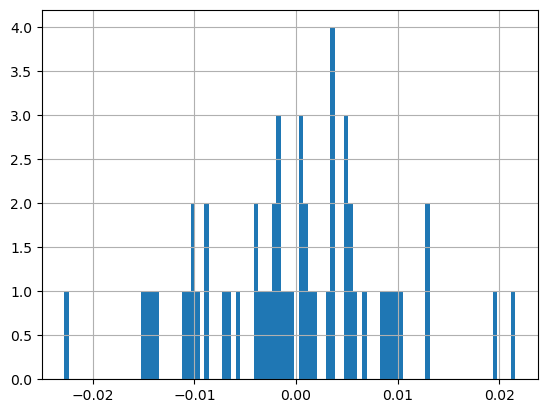

In [119]:
df_close_open[df_close_open['open_tick']].gap_perc.hist(bins=100)

(-0.015, 0.015)

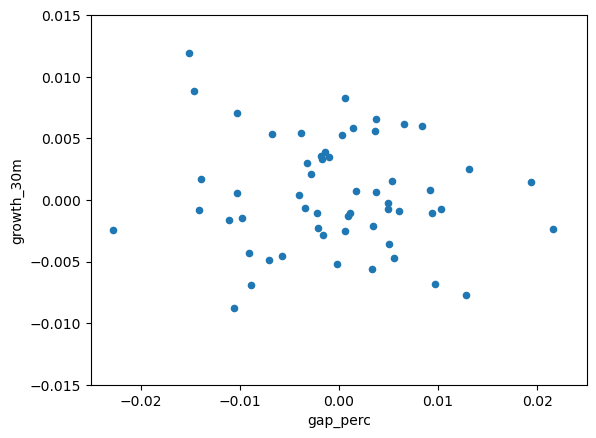

In [127]:
df[df.open_tick].plot.scatter(x='gap_perc',y='growth_30m')
plt.xlim(-0.025,0.025)
plt.ylim(-0.015,0.015)

In [128]:
df[df.open_tick][['gap','gap_perc','growth_30m']].corr()

,gap,gap_perc,growth_30m
gap,1.000000,0.999404,-0.098608
gap_perc,0.999404,1.000000,-0.099324
growth_30m,-0.098608,-0.099324,1.000000
